In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matplotlib import markers
import itertools

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
#X=np.unique(X, axis=0)
markers = markers.MarkerStyle.markers
colormap = plt.cm.Dark2.colors

In [3]:
distances = squareform(pdist(X, metric='euclidean'))
np.fill_diagonal(distances, np.inf)
distance_matrix=distances

In [4]:
num_points = X.shape[0]
X_data = np.c_[X, np.arange(0, num_points, 1)]

In [5]:
X_data.shape

(200, 3)

In [6]:
clusters = np.c_[distances, np.zeros((num_points, 2))]

In [7]:
dist_col_id = num_points
clust_col_id = num_points + 1

In [8]:
clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)

In [9]:
def find_clusters_to_merge(clusters, dist_col_id, clust_col_id):
    c1_ind=np.argmin(clusters[:,dist_col_id])
    c2_ind=clusters[c1_ind, clust_col_id].astype(int)
    distance=clusters[c1_ind, dist_col_id]
    return c1_ind, c2_ind, distance

In [10]:
def single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
    
    #print(c1_ind, c2_ind)
    for i in range(num_points):
        if clusters[i, c1_ind] > clusters[i, c2_ind]:
            clusters[i, c1_ind]=clusters[i, c2_ind]
            
    for j in range (num_points):
        if clusters[c1_ind, j] > clusters[c2_ind, j]:
            clusters[c1_ind, j]=clusters[c2_ind, j]
            
    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return X_data, clusters, dist_col_id, clust_col_id

In [11]:
def complete_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
    
    #print(c1_ind, c2_ind)
    for i in range(num_points):
        if clusters[i, c1_ind] < clusters[i, c2_ind]:
            clusters[i, c1_ind]=clusters[i, c2_ind]
            
    for j in range (num_points):
        if clusters[c1_ind, j] < clusters[c2_ind, j]:
            clusters[c1_ind, j]=clusters[c2_ind, j]
            
    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return X_data, clusters, dist_col_id, clust_col_id

In [12]:
def average_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id, distance_matrix):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
        
    #print(c1_ind, c2_ind)
    for i in range(num_points):
        dist=0
        m=0
        for j in range (X_data.shape[0]):
            if X_data[j, 2]==i:
                for k in range(X_data.shape[0]):
                    if X_data[k, 2]==c1_ind or X_data[k, 2]==c2_ind:
                        dist+=distance_matrix[j, k]
                        m+=1
        dist=dist/m
        clusters[i, c1_ind]=dist
            
    for j in range (num_points):
        dist=0
        m=0
        for i in range (X_data.shape[0]):
            if X_data[i, 2]==j:
                for k in range(X_data.shape[0]):
                    if X_data[k, 2]==c1_ind or X_data[k, 2]==c2_ind:
                        dist+=distance_matrix[i, k]
                        m+=1
        dist=dist/m
        clusters[c1_ind, j]=dist
            
    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return X_data, clusters, dist_col_id, clust_col_id

Merging clusters # 48 49


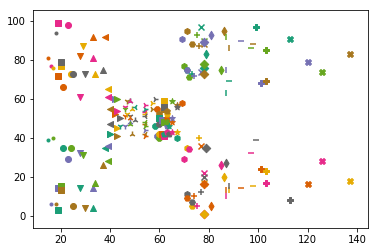

Merging clusters # 64 67
Merging clusters # 127 129
Merging clusters # 153 155
Merging clusters # 21 23
Merging clusters # 49 51
Merging clusters # 57 58
Merging clusters # 59 61
Merging clusters # 60 61
Merging clusters # 61 62
Merging clusters # 66 69
Merging clusters # 66 76
Merging clusters # 67 68
Merging clusters # 67 68
Merging clusters # 67 69
Merging clusters # 67 69
Merging clusters # 68 69
Merging clusters # 77 82
Merging clusters # 77 83
Merging clusters # 79 82
Merging clusters # 79 87
Merging clusters # 79 82
Merging clusters # 82 89
Merging clusters # 84 85
Merging clusters # 86 91
Merging clusters # 96 97
Merging clusters # 124 130
Merging clusters # 124 126
Merging clusters # 125 128
Merging clusters # 141 145
Merging clusters # 3 5


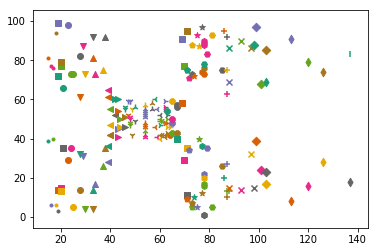

Merging clusters # 9 11
Merging clusters # 9 12
Merging clusters # 22 24
Merging clusters # 35 37
Merging clusters # 46 49
Merging clusters # 49 52
Merging clusters # 49 53
Merging clusters # 54 57
Merging clusters # 67 69
Merging clusters # 67 69
Merging clusters # 67 76
Merging clusters # 67 78
Merging clusters # 67 80
Merging clusters # 68 71
Merging clusters # 72 76
Merging clusters # 86 91
Merging clusters # 95 97
Merging clusters # 104 112
Merging clusters # 2 5
Merging clusters # 10 11
Merging clusters # 44 48
Merging clusters # 47 50
Merging clusters # 53 56
Merging clusters # 53 55
Merging clusters # 54 55
Merging clusters # 56 59
Merging clusters # 59 71
Merging clusters # 60 61
Merging clusters # 60 61
Merging clusters # 60 63


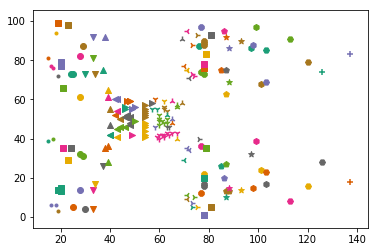

Merging clusters # 60 63
Merging clusters # 60 63
Merging clusters # 60 62
Merging clusters # 60 62
Merging clusters # 60 62
Merging clusters # 71 73
Merging clusters # 74 76
Merging clusters # 74 78
Merging clusters # 85 88
Merging clusters # 88 90
Merging clusters # 95 101
Merging clusters # 100 104
Merging clusters # 0 4
Merging clusters # 40 42
Merging clusters # 42 45
Merging clusters # 42 44
Merging clusters # 42 48
Merging clusters # 50 52
Merging clusters # 52 54
Merging clusters # 56 58
Merging clusters # 60 64
Merging clusters # 64 67
Merging clusters # 70 76
Merging clusters # 73 79
Merging clusters # 74 77
Merging clusters # 81 85
Merging clusters # 94 96
Merging clusters # 98 102
Merging clusters # 99 102
Merging clusters # 30 35


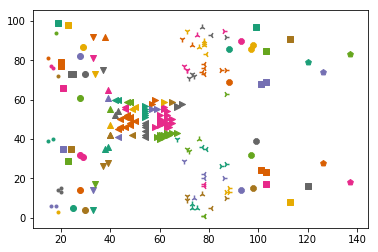

Merging clusters # 39 41
Merging clusters # 53 54
Merging clusters # 57 61
Merging clusters # 60 61
Merging clusters # 10 14
Merging clusters # 21 23
Merging clusters # 40 42
Merging clusters # 43 44
Merging clusters # 43 45
Merging clusters # 43 44
Merging clusters # 43 44
Merging clusters # 43 44
Merging clusters # 43 44
Merging clusters # 43 44
Merging clusters # 43 44
Merging clusters # 59 60
Merging clusters # 69 70
Merging clusters # 2 5
Merging clusters # 3 8
Merging clusters # 22 24
Merging clusters # 29 35
Merging clusters # 31 34
Merging clusters # 31 35
Merging clusters # 31 35
Merging clusters # 33 34
Merging clusters # 41 43
Merging clusters # 42 45
Merging clusters # 57 60
Merging clusters # 24 26
Merging clusters # 30 31


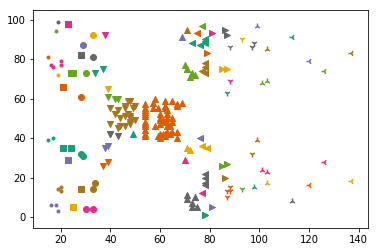

Merging clusters # 36 46
Merging clusters # 39 43
Merging clusters # 20 24
Merging clusters # 27 28
Merging clusters # 28 29
Merging clusters # 1 3
Merging clusters # 6 10
Merging clusters # 25 26
Merging clusters # 25 27
Merging clusters # 32 38
Merging clusters # 35 37
Merging clusters # 33 34
Merging clusters # 33 39
Merging clusters # 1 4
Merging clusters # 26 30
Merging clusters # 26 31
Merging clusters # 26 32
Merging clusters # 6 13
Merging clusters # 9 16
Merging clusters # 11 17
Merging clusters # 16 20
Merging clusters # 20 21
Merging clusters # 21 28
Merging clusters # 25 27
Merging clusters # 25 27
Merging clusters # 1 9
Merging clusters # 3 5
Merging clusters # 8 13
Merging clusters # 10 12
Merging clusters # 10 13


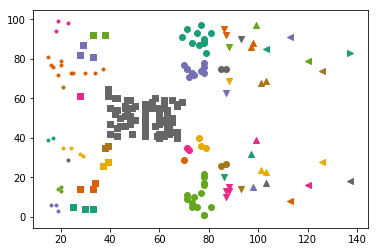

Merging clusters # 16 18
Merging clusters # 26 29
Merging clusters # 26 32
Merging clusters # 16 24
Merging clusters # 17 18
Merging clusters # 17 19
Merging clusters # 21 23
Merging clusters # 21 32
Merging clusters # 25 27
Merging clusters # 5 7
Merging clusters # 24 30
Merging clusters # 20 28
Merging clusters # 13 14
Merging clusters # 14 21
Merging clusters # 17 19
Merging clusters # 18 20
Merging clusters # 18 19
Merging clusters # 1 6
Merging clusters # 2 6
Merging clusters # 12 17
Merging clusters # 0 5
Merging clusters # 6 8
Merging clusters # 9 11
Merging clusters # 8 9
Merging clusters # 9 12
Merging clusters # 1 6
Merging clusters # 2 4
Merging clusters # 10 11
Merging clusters # 8 9
Merging clusters # 15 17


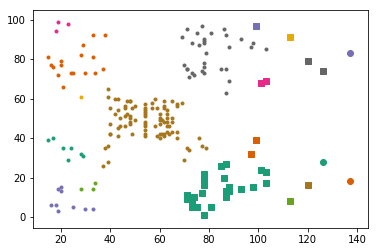

Merging clusters # 2 4
Merging clusters # 1 4
Merging clusters # 6 7
Merging clusters # 5 7
Merging clusters # 0 4
Merging clusters # 0 1
Merging clusters # 0 1
Merging clusters # 0 3
Merging clusters # 4 6
Merging clusters # 0 1
Merging clusters # 1 4
Merging clusters # 1 2
Merging clusters # 0 1
Merging clusters # 1 3
Merging clusters # 0 1
Merging clusters # 0 1


In [13]:
threshold=None
merge_distances = np.zeros(num_points - 1)
for i in range(0, num_points - 3):
    c1_ind, c2_ind, distance=find_clusters_to_merge(clusters, dist_col_id, clust_col_id)
    #print(c1_ind, c2_ind)
    #if threshold is set, we don't merge any further if we reached the desired max distance for merging
    if threshold is not None and distance > threshold:
        break
    merge_distances[i] = distance
    X_data, clusters, dist_col_id, clust_col_id= single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    #X_data, clusters, dist_col_id, clust_col_id= complete_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    #X_data, clusters, dist_col_id, clust_col_id= average_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id, distance_matrix)
    
    #uncomment when testing
    print("Merging clusters #", c1_ind, c2_ind)
    if i%30 == 0:
         for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
             plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker, label=k)
         plt.show()

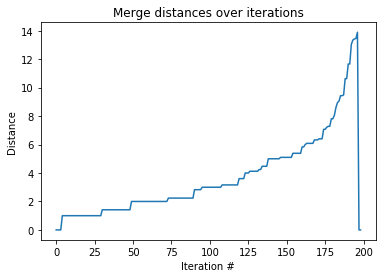

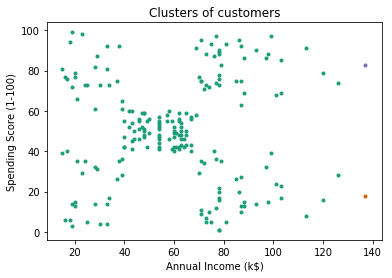

In [14]:
# todo use the plot below to find the optimal threshold to stop merging clusters
plt.plot(np.arange(0, num_points - 1, 1), merge_distances[:num_points - 1])
plt.title("Merge distances over iterations")
plt.xlabel("Iteration #")
plt.ylabel("Distance")
plt.show()

for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
    plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [74]:
delta0=1
for i in range(1, len(merge_distances)):
    delta=merge_distances[i]-merge_distances[i-1]
    print(delta, delta0)
    if delta>100*delta0 and delta0!=0:
        threshold=merge_distances[i]
        break
    delta0=delta

0.0 1
0.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.41421356237309515 0.0
0.0 0.41421356237309515
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.5857864376269049 0.0
0.0 0.5857864376269049
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.2360679774997898 0.0
0.0 0.2360679774997898
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.5923591472464005 0.0
0.0 0.5923591472464005
0.0 0.0
0.0 0.0
0.0 0.0
0.1715728752538097 0.0
0.0 0.1715728752538097
0.0 0.0
0.0 0.0
0.0 0.0
0.16227766016837952 0.0
0.0 0.16227766016837952
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.4432736152956096 0.0
0.0 0.4432736152956096
0.3944487245360109 0.0
0.0 0.3944487245360109
0.12310562561766059 0.0
0.0 0.12310562561766059
0.0 0.0
0.0 0.

In [75]:
threshold

0.0

In [16]:
c1_ind, c2_ind, distance=find_clusters_to_merge(clusters, dist_col_id, clust_col_id)
print(c1_ind, c2_ind, distance)

1 2 101.41498903022176


In [439]:
X_data, clusters, dist_col_id, clust_col_id= single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
print(X_data)

[[ 15  39   0]
 [ 15  81   1]
 [ 16   6   2]
 [ 16  77   3]
 [ 17  40   4]
 [ 17  76   5]
 [ 18   6   6]
 [ 18  94   7]
 [ 19   3   8]
 [ 19  72   9]
 [ 19  14  10]
 [ 19  99  11]
 [ 20  15  12]
 [ 20  77  13]
 [ 20  13  14]
 [ 20  79  15]
 [ 21  35  16]
 [ 21  66  17]
 [ 23  29  18]
 [ 23  98  19]
 [ 24  35  20]
 [ 24  73  21]
 [ 25   5  22]
 [ 25  73  23]
 [ 28  14  24]
 [ 28  82  25]
 [ 28  32  26]
 [ 28  61  27]
 [ 29  31  28]
 [ 29  87  29]
 [ 30   4  30]
 [ 30  73  31]
 [ 33   4  32]
 [ 33  92  33]
 [ 33  14  34]
 [ 33  81  35]
 [ 34  17  36]
 [ 34  73  37]
 [ 37  26  38]
 [ 37  75  39]
 [ 38  35  40]
 [ 38  92  41]
 [ 39  36  42]
 [ 39  61  43]
 [ 39  28  44]
 [ 39  65  45]
 [ 40  55  46]
 [ 40  47  47]
 [ 40  42  48]
 [ 40  42  48]
 [ 42  52  49]
 [ 42  60  50]
 [ 43  54  51]
 [ 43  60  52]
 [ 43  45  53]
 [ 43  41  54]
 [ 44  50  55]
 [ 44  46  56]
 [ 46  51  57]
 [ 46  46  58]
 [ 46  56  59]
 [ 46  55  60]
 [ 47  52  61]
 [ 47  59  62]
 [ 48  51  63]
 [ 48  59  64]
 [ 48  50 

In [295]:
np.unique(X_data[:,2], return_counts=True)

(array([0], dtype=int64), array([200], dtype=int64))